**TERRA-REF Season 4 Weather Preprocessing**
C. Lisle, Knowledgevis, LLC

Copyright © 2020 KnowledgeVis, LLC. All Rights Reserved.

Redistribution and use, with or without modification, are permitted provided that the following conditions are met:

Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.
The name of the author may not be used to endorse or promote products derived from this software without specific prior written permission.
THIS SOFTWARE IS PROVIDED BY KNOWLEDGEVIS, LLC "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE AUTHOR BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

The API exposed by the TERRA-REF program was used to download this.  In particular, the instructions on the TERRA-REF site provided examples in the R language.  So the following R code was used to download the weather datasets. Note how the start and stop dates are provided as query parameters in the URL.  Change to any desired date range:

    weather_all <- fromJSON('https://terraref.org/clowder/api/geostreams/datapoints?stream_id=46431&since=2017-04-01&until=2017-09-01', flatten = FALSE)
    weather_data <- weather_all$properties %>% 
      mutate(time = with_tz(ymd_hms(weather_all$end_time), "America/Phoenix"))
    write.csv(weather_data,"2017-s4-weather.csv")

For additional information, please see the webpage with weather tutorial information:
    
https://terraref.github.io/tutorials/accessing-meteorological-data.html

In [1]:
import pandas as pd

In [18]:
weather_df = pd.read_csv("/Users/curtislisle/Downloads/season4-2017-weather-data.csv")

In [19]:
weather_df.dtypes

source                                                    object
wind_speed                                               float64
source_file                                               object
eastward_wind                                            float64
northward_wind                                           float64
air_temperature                                          float64
relative_humidity                                        float64
precipitation_rate                                       float64
surface_downwelling_shortwave_flux_in_air                float64
surface_downwelling_photosynthetic_photon_flux_in_air    float64
time                                                      object
dtype: object

In [20]:
weather_df['time'] = pd.to_datetime(weather_df['time'])

In [21]:
from datetime import datetime
print(datetime.strptime('2017-05-01 12:00:00', '%Y-%m-%d %H:%M:%S'))

2017-05-01 12:00:00


In [22]:
# add an offset column that subtracts a "start date" from each of the datetimes in the samples.  This will give us an offset in days
weather_df['day_offset'] = weather_df['time'] - datetime.strptime('2017-05-01 12:00:00', '%Y-%m-%d %H:%M:%S')

In [23]:
# pandas series don't like the df['column'].dt.days notation, so just convert to an int. Divide by the number of microseconds in a day
weather_df['day_offset'] = weather_df['day_offset'].astype('int64')/ 86400000000000
weather_df['day_offset'] = weather_df['day_offset'].astype(int)
weather_df.head()

,source,wind_speed,source_file,eastward_wind,northward_wind,air_temperature,relative_humidity,precipitation_rate,surface_downwelling_shortwave_flux_in_air,surface_downwelling_photosynthetic_photon_flux_in_air,time,day_offset
0,https://terraref.ncsa.illinois.edu/clowder/dat...,4.749167,58f072ee4f0c430e2f19a4a3,-4.572750,1.030712,298.081859,10.989487,0.0,109.774359,298.567308,2017-04-09 17:35:00,-21
1,https://terraref.ncsa.illinois.edu/clowder/dat...,4.850900,58f072ee4f0c430e2f19a4a3,-4.657362,1.257373,298.047333,10.864467,0.0,123.538667,324.997333,2017-04-09 17:40:00,-21
2,https://terraref.ncsa.illinois.edu/clowder/dat...,4.358133,58f072ee4f0c430e2f19a4a3,-4.152557,0.989563,298.082600,10.556667,0.0,114.827667,304.575000,2017-04-09 17:45:00,-21
3,https://terraref.ncsa.illinois.edu/clowder/dat...,4.440767,58f072ee4f0c430e2f19a4a3,-4.029715,1.771322,297.947733,10.525867,0.0,82.481300,228.470667,2017-04-09 17:50:00,-21
4,https://terraref.ncsa.illinois.edu/clowder/dat...,4.582700,58f072ee4f0c430e2f19a4a3,-4.546604,0.151735,297.743600,11.378367,0.0,76.268900,207.507000,2017-04-09 17:55:00,-21


In [24]:
weather_df["date"] = weather_df["time"]

In [35]:
# so we can index by date/time
weather_df.loc[(weather_df['date'] > "2017-07-01 00:00:00" ) & (weather_df['date'] < "2017-07-11 12:00:00")]

,source,wind_speed,source_file,eastward_wind,northward_wind,air_temperature,relative_humidity,precipitation_rate,surface_downwelling_shortwave_flux_in_air,surface_downwelling_photosynthetic_photon_flux_in_air,time,day_offset,date
3054,https://terraref.ncsa.illinois.edu/clowder/dat...,1.956866,597a12824f0c7dbcc55c15b8,1.670302,-0.759405,303.699770,49.117097,0.0,324.140092,919.193548,2017-07-11 09:20:00,70,2017-07-11 09:20:00
3055,https://terraref.ncsa.illinois.edu/clowder/dat...,1.687433,597a12824f0c7dbcc55c15b8,1.285206,-0.946716,303.845567,48.952467,0.0,307.892667,878.060000,2017-07-11 09:25:00,70,2017-07-11 09:25:00
3056,https://terraref.ncsa.illinois.edu/clowder/dat...,1.396333,597a12824f0c7dbcc55c15b8,0.994331,-0.814448,303.846167,48.864067,0.0,288.330000,829.626667,2017-07-11 09:30:00,70,2017-07-11 09:30:00
3057,https://terraref.ncsa.illinois.edu/clowder/dat...,1.518233,597a12824f0c7dbcc55c15b8,0.740098,-1.131302,303.887067,48.575933,0.0,303.588333,873.023000,2017-07-11 09:35:00,70,2017-07-11 09:35:00
3058,https://terraref.ncsa.illinois.edu/clowder/dat...,1.474800,597a12824f0c7dbcc55c15b8,1.067108,-0.886523,304.050767,47.997667,0.0,350.163333,995.770000,2017-07-11 09:40:00,70,2017-07-11 09:40:00
3059,https://terraref.ncsa.illinois.edu/clowder/dat...,1.964233,597a12824f0c7dbcc55c15b8,0.745736,-1.673062,304.236767,47.327967,0.0,303.329667,873.553333,2017-07-11 09:45:00,70,2017-07-11 09:45:00
3060,https://terraref.ncsa.illinois.edu/clowder/dat...,1.259200,597a12824f0c7dbcc55c15b8,0.643247,-0.800930,304.304167,47.008000,0.0,334.865333,961.406667,2017-07-11 09:50:00,70,2017-07-11 09:50:00
3061,https://terraref.ncsa.illinois.edu/clowder/dat...,1.014500,597a12824f0c7dbcc55c15b8,0.668246,-0.673149,304.539633,46.408633,0.0,367.939667,1050.450000,2017-07-11 09:55:00,70,2017-07-11 09:55:00
3062,https://terraref.ncsa.illinois.edu/clowder/dat...,2.005900,597a12824f0c7dbcc55c15b8,0.430981,-1.904067,304.989867,44.633867,0.0,346.391667,986.770000,2017-07-11 10:00:00,70,2017-07-11 10:00:00
3063,https://terraref.ncsa.illinois.edu/clowder/dat...,1.353933,597a12824f0c7dbcc55c15b8,0.387501,-1.164372,305.268400,43.591367,0.0,359.415000,1021.933333,2017-07-11 10:05:00,70,2017-07-11 10:05:00


The biologists have advised that growth is related to the cumulative amount of "energy" a plant has received during this growing season.  The "growing degree day" metric is used for determining how much each day counts toward maximum growth.  As far as I understand, the maturity of a plant can be predicted roughy from its species and the number of growing-degree-days in the current season.  For extra information, review the Wikipedia page here: https://en.wikipedia.org/wiki/Growing_degree-day

For our purposes, the GDD (growing degree day) is calculated from the original weather information using the simplified equation from the wikipedia page.  Here is the corresponding R code to create the GDD and cumulatve GDD, from the tutorial page (https://terraref.github.io/tutorials/combining-trait-weather-and-image-datasets.html).  I have run this already and generated the season4-growing-day table that might be helpful as a dataset augmentation:

    daily_values = weather %>% 
      mutate(day = as.Date(time), 
         air_temp_converted = air_temperature - 273.15) %>% 
      group_by(day) %>% 
      summarise(min_temp = min(air_temp_converted), 
            max_temp = max(air_temp_converted), 
            gdd = ifelse(sum(min_temp, max_temp) / 2 > 10, 
                         (max_temp + min_temp) / 2 - 10, 0))
    daily_values <- daily_values %>% 
      mutate(gdd_cum = cumsum(gdd))

In [38]:
gdd_df = pd.read_csv("/Users/curtislisle/Downloads/season4-growing-day.csv")
gdd_df.head()

,day,min_temp,max_temp,gdd,gdd_cum
0,2017-04-09,18.279844,18.279844,8.279844,8.279844
1,2017-04-10,13.247211,24.932600,9.089906,17.369749
2,2017-04-11,9.684867,19.021733,4.353300,21.723050
3,2017-04-12,16.458367,32.960233,14.709300,36.432350
4,2017-04-13,16.162283,33.128667,14.645475,51.077824


### canopy cover

There is also a single measurement that was available from a different weather API endpoint, called canopy_cover.  This is the percentage of overall ground covered by plants across the field.  it is measured every few days.

In [11]:
canopy_df = pd.read_csv("/Users/curtislisle/Downloads/season4-2017-canopy-cover.csv")

In [12]:
canopy_df.head()

,source,canopy_cover,time
0,https://terraref.ncsa.illinois.edu/clowder/fil...,0.001178,2017-04-26 12:00:00
1,https://terraref.ncsa.illinois.edu/clowder/fil...,0.000000,2017-04-27 12:00:00
2,https://terraref.ncsa.illinois.edu/clowder/fil...,0.000000,2017-04-29 12:00:00
3,https://terraref.ncsa.illinois.edu/clowder/fil...,0.000051,2017-05-05 12:00:00
4,https://terraref.ncsa.illinois.edu/clowder/fil...,0.000000,2017-05-09 12:00:00


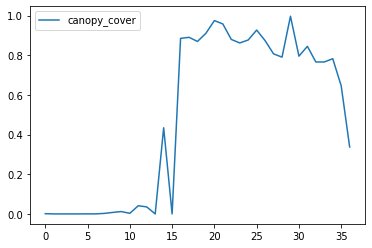

In [13]:
canopy_df.plot()

In [14]:
canopy_df['date'] = pd.to_datetime(canopy_df['time'])

In [15]:
from datetime import datetime
print(datetime.strptime('2017-05-01 12:00:00', '%Y-%m-%d %H:%M:%S'))

2017-05-01 12:00:00


In [16]:
# add an offset column that subtracts a "start date" from each of the datetimes in the samples.  This will give us an offset in days
canopy_df['day_offset'] = canopy_df['date'] - datetime.strptime('2017-05-01 12:00:00', '%Y-%m-%d %H:%M:%S')

In [17]:
# pandas series don't like the df['column'].dt.days notation, so just convert to an int. Divide by the number of microseconds in a day
canopy_df['day_offset'] = canopy_df['day_offset'].astype('int64')/ 86400000000000
canopy_df['day_offset'] = canopy_df['day_offset'].astype(int)
canopy_df.head()

,source,canopy_cover,time,date,day_offset
0,https://terraref.ncsa.illinois.edu/clowder/fil...,0.001178,2017-04-26 12:00:00,2017-04-26 12:00:00,-5
1,https://terraref.ncsa.illinois.edu/clowder/fil...,0.000000,2017-04-27 12:00:00,2017-04-27 12:00:00,-4
2,https://terraref.ncsa.illinois.edu/clowder/fil...,0.000000,2017-04-29 12:00:00,2017-04-29 12:00:00,-2
3,https://terraref.ncsa.illinois.edu/clowder/fil...,0.000051,2017-05-05 12:00:00,2017-05-05 12:00:00,4
4,https://terraref.ncsa.illinois.edu/clowder/fil...,0.000000,2017-05-09 12:00:00,2017-05-09 12:00:00,8


### Season 6 processing

We are extracting directly from Clowder using Python this time.  The first time, we extracted using R because the terra-ref tuturial had used that method. 

In [2]:
import requests
import json

In [5]:
w6 = requests.get('https://terraref.org/clowder/api/geostreams/datapoints?stream_id=46431&since=2018-02-01&until=2018-09-01',data={'flatten':'true'})

In [7]:
len(w6.json())

56625

In [8]:
import pandas as pd
w6_df = pd.DataFrame(w6.json())

In [9]:
print(w6_df.shape)
w6_df.head()

(56625, 10)


,id,created,start_time,end_time,properties,type,geometry,stream_id,sensor_id,sensor_name
0,155476196,2018-05-25T21:03:01Z,2018-02-01T06:00:00Z,2018-02-01T06:05:00Z,{'source': 'https://terraref.ncsa.illinois.edu...,Feature,"{'type': 'Point', 'coordinates': [33.074566666...",46431,438,UA-MAC Field Scanner Weather Station
1,155476197,2018-05-25T21:03:01Z,2018-02-01T06:05:00Z,2018-02-01T06:10:00Z,{'source': 'https://terraref.ncsa.illinois.edu...,Feature,"{'type': 'Point', 'coordinates': [33.074566666...",46431,438,UA-MAC Field Scanner Weather Station
2,155476198,2018-05-25T21:03:01Z,2018-02-01T06:10:00Z,2018-02-01T06:15:00Z,{'source': 'https://terraref.ncsa.illinois.edu...,Feature,"{'type': 'Point', 'coordinates': [33.074566666...",46431,438,UA-MAC Field Scanner Weather Station
3,155476199,2018-05-25T21:03:01Z,2018-02-01T06:15:00Z,2018-02-01T06:20:00Z,{'source': 'https://terraref.ncsa.illinois.edu...,Feature,"{'type': 'Point', 'coordinates': [33.074566666...",46431,438,UA-MAC Field Scanner Weather Station
4,155476200,2018-05-25T21:03:01Z,2018-02-01T06:20:00Z,2018-02-01T06:25:00Z,{'source': 'https://terraref.ncsa.illinois.edu...,Feature,"{'type': 'Point', 'coordinates': [33.074566666...",46431,438,UA-MAC Field Scanner Weather Station


In [11]:
w6_df['properties'].values[0]

{'source': 'https://terraref.ncsa.illinois.edu/clowder/datasets/5ad1b4d74f0cda771246ea9d',
 'wind_speed': 2.355633333333334,
 'source_file': '5ad1b4dd4f0cda771246eb5e',
 'eastward_wind': 0.7532605107327129,
 'northward_wind': -2.2236267071655913,
 'air_temperature': 283.5697333333333,
 'relative_humidity': 38.836166666666756,
 'precipitation_rate': 0.0,
 'surface_downwelling_shortwave_flux_in_air': 0.18018666666666588,
 'surface_downwelling_photosynthetic_photon_flux_in_air': 0.0}

In [13]:
# iterate through the dataframe and pull out the 
w6_list = []
event_times_list = []
for index, row in w6_df.iterrows():
    w6_list.append(row['properties'])
    event_times_list.append(row['start_time'])
print(len(w6_list))
print(len(event_times_list))

56625
56625


In [16]:
# build a single flat dataframe with a row for each measurement
w6dates = []
for index,entry in enumerate(w6_list):
    entry['date'] = event_times_list[index]
    w6dates.append(entry)
print(w6dates[0])
w6_full = pd.DataFrame(w6dates)
w6_full.head()

{'source': 'https://terraref.ncsa.illinois.edu/clowder/datasets/5ad1b4d74f0cda771246ea9d', 'wind_speed': 2.355633333333334, 'source_file': '5ad1b4dd4f0cda771246eb5e', 'eastward_wind': 0.7532605107327129, 'northward_wind': -2.2236267071655913, 'air_temperature': 283.5697333333333, 'relative_humidity': 38.836166666666756, 'precipitation_rate': 0.0, 'surface_downwelling_shortwave_flux_in_air': 0.18018666666666588, 'surface_downwelling_photosynthetic_photon_flux_in_air': 0.0, 'date': '2018-02-01T06:00:00Z'}


,source,wind_speed,source_file,eastward_wind,northward_wind,air_temperature,relative_humidity,precipitation_rate,surface_downwelling_shortwave_flux_in_air,surface_downwelling_photosynthetic_photon_flux_in_air,date
0,https://terraref.ncsa.illinois.edu/clowder/dat...,2.355633,5ad1b4dd4f0cda771246eb5e,0.753261,-2.223627,283.569733,38.836167,0.0,0.180187,0.0,2018-02-01T06:00:00Z
1,https://terraref.ncsa.illinois.edu/clowder/dat...,2.370833,5ad1b4dd4f0cda771246eb5e,0.787971,-2.227670,283.926833,36.693833,0.0,0.215137,0.0,2018-02-01T06:05:00Z
2,https://terraref.ncsa.illinois.edu/clowder/dat...,2.299967,5ad1b4dd4f0cda771246eb5e,0.552473,-2.225894,283.988133,34.964600,0.0,0.153003,0.0,2018-02-01T06:10:00Z
3,https://terraref.ncsa.illinois.edu/clowder/dat...,2.255467,5ad1b4dd4f0cda771246eb5e,0.621623,-2.159845,283.915500,35.045400,0.0,0.180963,0.0,2018-02-01T06:15:00Z
4,https://terraref.ncsa.illinois.edu/clowder/dat...,2.233533,5ad1b4dd4f0cda771246eb5e,0.567103,-2.150096,283.914833,34.808733,0.0,0.156110,0.0,2018-02-01T06:20:00Z


Add date offset into the season to match the day_offset value in the trait datafiles for season 6.  The times in the weather dataset are in Zulu, so need to deal with timezones.  MST (Maricopa, AZ) is 7 hours behind GMT (https://greenwichmeantime.com/time/to/gmt-mst/). So noon time (which is when most trait measurements are dated, is 7PM GMT of 19:00Z.  

In [19]:
w6_full['date'] = pd.to_datetime(w6_full['date'])

In [60]:
for index,row in w6_full.iterrows():
    print(row['date'])
    break

2018-02-01 06:00:00+00:00


In [68]:
from datetime import datetime
from pytz import timezone
import pytz

# 12-noon in MST (Maricopa) is 7PM in UTC, which is the timezone the weather is reported in.  We need to have all 
# the same timezone to do offset math in python's datetime package

starttime = datetime.strptime('2018-05-06 19:00:00', '%Y-%m-%d %H:%M:%S')
starttime_utc = pytz.utc.localize(starttime)
print(starttime)
print(starttime_utc)


2018-05-06 19:00:00
2018-05-06 19:00:00+00:00


In [64]:
# add an offset column that subtracts a "start date" from each of the datetimes in the samples.  This will give us an offset in days
w6_full['day_offset'] = w6_full['date'] - starttime_utc

In [65]:
# here is how a timedelta offset is converted to its component part
w6_full['day_offset'][0].days

-95

In [69]:
# pandas series don't like the df['column'].dt.days notation, so just convert to an int. Divide by the number of microseconds in a day
w6_full['day_offset'] = w6_full['day_offset'].astype('int64')/ 86400000000000
w6_full.head()

,source,wind_speed,source_file,eastward_wind,northward_wind,air_temperature,relative_humidity,precipitation_rate,surface_downwelling_shortwave_flux_in_air,surface_downwelling_photosynthetic_photon_flux_in_air,date,day_offset
0,https://terraref.ncsa.illinois.edu/clowder/dat...,2.355633,5ad1b4dd4f0cda771246eb5e,0.753261,-2.223627,283.569733,38.836167,0.0,0.180187,0.0,2018-02-01 06:00:00+00:00,-94.541667
1,https://terraref.ncsa.illinois.edu/clowder/dat...,2.370833,5ad1b4dd4f0cda771246eb5e,0.787971,-2.227670,283.926833,36.693833,0.0,0.215137,0.0,2018-02-01 06:05:00+00:00,-94.538194
2,https://terraref.ncsa.illinois.edu/clowder/dat...,2.299967,5ad1b4dd4f0cda771246eb5e,0.552473,-2.225894,283.988133,34.964600,0.0,0.153003,0.0,2018-02-01 06:10:00+00:00,-94.534722
3,https://terraref.ncsa.illinois.edu/clowder/dat...,2.255467,5ad1b4dd4f0cda771246eb5e,0.621623,-2.159845,283.915500,35.045400,0.0,0.180963,0.0,2018-02-01 06:15:00+00:00,-94.531250
4,https://terraref.ncsa.illinois.edu/clowder/dat...,2.233533,5ad1b4dd4f0cda771246eb5e,0.567103,-2.150096,283.914833,34.808733,0.0,0.156110,0.0,2018-02-01 06:20:00+00:00,-94.527778


In [71]:
mayWeather = w6_full.loc[w6_full['date']>'2018-05-01']
mayWeather.head()

,source,wind_speed,source_file,eastward_wind,northward_wind,air_temperature,relative_humidity,precipitation_rate,surface_downwelling_shortwave_flux_in_air,surface_downwelling_photosynthetic_photon_flux_in_air,date,day_offset
981,https://terraref.ncsa.illinois.edu/clowder/dat...,NaN,5aed05334f0c026b4577cc01,NaN,NaN,288.306948,38.536103,0.0,4.422441,15.060751,2018-05-01 12:46:27+00:00,-5.259410
982,https://terraref.ncsa.illinois.edu/clowder/dat...,NaN,5aed05334f0c026b4577cc01,NaN,NaN,288.002933,39.626200,0.0,7.066870,22.583967,2018-05-01 12:50:00+00:00,-5.256944
983,https://terraref.ncsa.illinois.edu/clowder/dat...,NaN,5aed05334f0c026b4577cc01,NaN,NaN,287.928000,40.482433,0.0,11.196900,34.005067,2018-05-01 12:55:00+00:00,-5.253472
984,https://terraref.ncsa.illinois.edu/clowder/dat...,NaN,5aed05334f0c026b4577cc01,NaN,NaN,287.832900,40.787033,0.0,18.882867,51.193567,2018-05-01 13:00:00+00:00,-5.250000
985,https://terraref.ncsa.illinois.edu/clowder/dat...,NaN,5aed05334f0c026b4577cc01,NaN,NaN,287.759700,41.140933,0.0,26.741433,70.089433,2018-05-01 13:05:00+00:00,-5.246528


In [73]:
w6_full.to_csv('season6-weather-data.csv')